<a href="https://colab.research.google.com/github/nefeligk/Mura-Dataset/blob/main/EfficientNet_(19_06_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Mura Dataset

In [ ]:
import tensorflow as tf

tf.keras.utils.get_file("mura.zip", "https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip", extract=True, archive_format='zip')

3380256768/3380245855 [==============================] - 81s 0us/step


'/root/.keras/datasets/mura.zip'

In [ ]:
!unzip /root/.keras/datasets/mura.zip

Streaming output truncated to the last 5000 lines.
   creating: MURA-v1.1/train/XR_SHOULDER/patient01061/
   creating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image1.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image3.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image2.png  
   creating: MURA-v1.1/train/XR_SHOULDER/patient01016/
   creating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image1.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image3.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image2.png  
   creating: MURA-v1.1/train/XR_SHOULDER/patient01182/
   creating: MURA-v1.1/train/XR_SHOULDER/patient01182/study1_positive/
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01182/study1_positive/ima

#Dataset Statistics

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures

import os
from glob import glob

In [ ]:
#csv files path in drive
path = '/content/MURA-v1.1'

In [ ]:
train_image_paths_csv = "train_image_paths.csv"

train_images_paths = pd.read_csv(os.path.join(path,train_image_paths_csv),dtype=str,header=None)
train_images_paths.columns = ['image_path']

train_images_paths['label'] = train_images_paths['image_path'].map(lambda x:'positive' if 'positive' in x else 'negative')
train_images_paths['category']  = train_images_paths['image_path'].apply(lambda x: x.split('/')[2])  
train_images_paths['patientId']  = train_images_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient',''))

In [ ]:
valid_image_paths_csv = "valid_image_paths.csv"
valid_data_paths = pd.read_csv(os.path.join(path,valid_image_paths_csv),dtype=str,header=None)
valid_data_paths.columns = ['image_path']

valid_data_paths['label'] = valid_data_paths['image_path'].map(lambda x:'positive' if 'positive' in x else 'negative')
valid_data_paths['category']  = valid_data_paths['image_path'].apply(lambda x: x.split('/')[2]) 
valid_data_paths['patientId']  = valid_data_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient',''))

In [ ]:
total_number_of_training_images = np.shape(train_images_paths)[0]
print("total number of images:",total_number_of_training_images )
print ("\n\nnumber of null values", train_images_paths.isnull().sum())
print("\n\nnumber of training images:",np.shape(train_images_paths['image_path'])[0])


categories_counts = pd.DataFrame(train_images_paths['category'].value_counts())
print ('\n\ncategories:\n',categories_counts )
print('\n\nnumber of patients:',train_images_paths['patientId'].nunique())
print('\n\nnumber of labels:',train_images_paths['label'].nunique())
print ('\n\npositive casses:',len(train_images_paths[train_images_paths['label']=='positive']))
print ('\n\nnegative casses:',len(train_images_paths[train_images_paths['label']=='negative']))

total number of images: 36808


number of null values image_path    0
label         0
category      0
patientId     0
dtype: int64


number of training images: 36808


categories:
              category
XR_WRIST         9752
XR_SHOULDER      8379
XR_HAND          5543
XR_FINGER        5106
XR_ELBOW         4931
XR_FOREARM       1825
XR_HUMERUS       1272


number of patients: 11184


number of labels: 2


positive casses: 14873


negative casses: 21935


In [ ]:
print("data_shape:",np.shape(valid_data_paths))
print ("\n\nnumber of null values", valid_data_paths.isnull().sum())
print("\n\nnumber of training images:",np.shape(valid_data_paths['image_path']))

validaton_categories_counts = pd.DataFrame(valid_data_paths['category'].value_counts())
print ('\n\ncategories:\n',validaton_categories_counts)
print('\n\nnumber of patients:',valid_data_paths['patientId'].nunique())
print('\n\nnumber of labels:',valid_data_paths['label'].nunique())
print ('\n\npositive casses:',len(valid_data_paths[valid_data_paths['label']=='positive']))
print ('\n\nnegative casses:',len(valid_data_paths[valid_data_paths['label']=='negative']))

data_shape: (3197, 4)


number of null values image_path    0
label         0
category      0
patientId     0
dtype: int64


number of training images: (3197,)


categories:
              category
XR_WRIST          659
XR_SHOULDER       563
XR_ELBOW          465
XR_FINGER         461
XR_HAND           460
XR_FOREARM        301
XR_HUMERUS        288


number of patients: 783


number of labels: 2


positive casses: 1530


negative casses: 1667


# Data Preprocess

In [ ]:
# S = Μεγεθος εικόνας για rescale, part = Η κατηγορία που επιλέξαμε
s = 256
part = "XR_HUMERUS"

In [ ]:
j_train = 0
for i in range(36808):
  if (train_images_paths['category'][i] == part):
    j_train +=1
print (j_train)  

j_dev = 0
for i in range(3197):
  if (valid_data_paths['category'][i] == part):
    j_dev +=1
print (j_dev)  

1272
288


In [ ]:
x_train = np.ones((j_train, s, s, 3))
x_dev = np.ones((j_dev, s, s, 3))

In [ ]:
y_train = np.ones((j_train, 1))
y_dev = np.ones((j_dev, 1))

In [ ]:
#x_train : numpy array with training examples, y_train: labels

from PIL import Image
newsize = (s, s)
j=0
for i in range(36808):
    if (train_images_paths['category'][i] == part):
      image = Image.open('/content/'+train_images_paths['image_path'][i])
      image = image.resize(newsize)
      image = np.array(image)
      if(image.shape==(s, s, 3)):
          image =image[:s, :s,:1]
          image = image.reshape((s, s, 1))
      image = image.reshape((s, s, 1))
      x_train[j] = np.concatenate((image,image,image), axis=2)

          #create binary labels
      if(train_images_paths['label'][i]) == 'positive':
          y_train[j] = y_train[j]*1
      else:
          y_train[j] = y_train[j]*0
      j += 1    

In [ ]:
#x_dev : numpy array with test examples, y_dev: labels

from PIL import Image
newsize = (s, s)
j = 0
for i in range(3197):
    if valid_data_paths['category'][i] == part:
      image = Image.open('/content/'+valid_data_paths['image_path'][i])
      image = image.resize(newsize)
      image = np.array(image)
      if(image.shape==(s, s, 3)):
          image =image[:s, :s,:1]
          image = image.reshape((s, s, 1))

      image = image.reshape((s, s, 1))
      
      x_dev[j] = np.concatenate((image,image,image), axis=2)
      
          #create binary labels
      if(valid_data_paths['label'][i]) == 'positive':
          y_dev[j] = y_dev[j]*1
      else:
          y_dev[j] = y_dev[j]*0
      j+=1

##Split data set

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=12547392)

print('Train samples: {}'.format(len(x_train)))
print('Val samples: {}'.format(len(x_valid)))

Train samples: 1144
Val samples: 128


#Tuning με train-valid split





##Tune with val_accuracy

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping # Callback for early stopping
from tensorflow.keras.layers import Input, Dense, Dropout # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.8.2


In [ ]:
#!pip install -q -U keras-tuner

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.callbacks import EarlyStopping # Callback for early stopping
from tensorflow.keras.layers import Input, Conv2D, Add, Dense, Dropout, Flatten, MaxPool2D # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

N_CLASSES = 1

with tf.device('/device:GPU:0'):

  def build_model(hp):


    earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=15,
    verbose=2,
    mode="max",
    baseline=None,
    restore_best_weights=True,
    )

    input = Input(
        shape=input_shape,
        name='Input'
    )

    x = input




    base_model = EfficientNetB0(
      input_shape=input_shape,
      include_top=False,
      weights="imagenet",
      input_tensor=None,
      pooling='max'
    )
    x = base_model.output



    # Tune the mlp layers 
    #dropout_rate = hp.Float(f"drop_rate", min_value=0.0, max_value=0.6, step=0.1)
    for i in range(hp.Int(f"mlp_layers",1,5)):
        x = Dense(
            units=hp.Choice(f"units_{i+1}", (64,128,256,512,1024)),
            kernel_initializer='glorot_uniform',
            activation=hp.Choice(f"activation_{i+1}", ["relu", "tanh"]),
            name='Hidden-{0:d}'.format(i + 1)
        )(x)
        x = Dropout(rate=hp.Float(f"hid_dropout_{i+1}", min_value=0.0, max_value=0.5, step=0.1))(x)
        
    
    
    # Define the output layer.
    output = Dense(
        units=1,
        activation='sigmoid',
        name='Output'
    )(x)


    lr_upper = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
  

    upper_layers_optimizer = Adam(lr_upper)
  

    model = Model(inputs=base_model.input, outputs=output)  

    for layer in base_model.layers:
        layer.trainable = False 

    model.compile(optimizer=upper_layers_optimizer, loss='binary_crossentropy', metrics=['binary_crossentropy','accuracy'])
    
    print('Finished tuning upper layers.')
    print('------------------') 

    model.summary() # Print a description of the model.
    return model

In [ ]:
if not os.path.exists('./tuning'):
    os.makedirs('./tuning')

import keras_tuner as kt

input_shape = (s, s, 3)

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=2,
    overwrite=True,
    directory='tuning/hyperparameters_mob',
    project_name="hyperparameters_mob",
)


earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=15,
    verbose=2,
    mode="max",
    baseline=None,
    restore_best_weights=True,
)


tuner.search(x_train, y_train, batch_size = 128, epochs=70, validation_data=(x_valid, y_valid), callbacks=[earlyStopping])


# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=x_valid.shape)
best_model.summary()
tuner.search_space_summary()
tuner.results_summary()

Trial 20 Complete [00h 07m 48s]
val_accuracy: 0.796875

Best val_accuracy So Far: 0.796875
Total elapsed time: 01h 34m 29s
INFO:tensorflow:Oracle triggered exit
Finished tuning upper layers.
------------------
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling[0][0]

# Data augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagenerator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8,1.0],
    zoom_range=[0.9,1.0],
    horizontal_flip=True)

#Train and Tune Full Network




##Train upper layers

We train the upper layers based on the hyperparameters found during tuning, to tune the full network learning rate

In [ ]:
!pip install -U tensorflow-addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.layers import BatchNormalization, DepthwiseConv2D
from tensorflow.keras.applications import EfficientNetB0

input_shape = (s, s, 3)
def train_model(
        upper_layers_optimizer,
        full_network_optimizer,
        upper_layers_epochs=30,
        full_network_epochs=30,
        batch_size=128,
        mlp_hidden_layers=[1024, 1024, 512],
        mlp_hidden_activation='relu',
        mlp_hidden_activation_2='relu',
        mlp_hidden_activation_3='relu',
        mlp_dropout=0.2,
        mlp_dropout_2=0.2,
        mlp_dropout_3=0.2,
        output_activation='sigmoid',
        callbacks=None,
        verbose=0):
    
    np.random.seed(1402) # Define the seed for numpy to have reproducible experiments.
    set_seed(1981) # Define the seed for Tensorflow to have reproducible experiments.    


    base_model = EfficientNetB0(
      input_shape=input_shape,
      include_top=False,
      weights="imagenet",
      input_tensor=None,
      pooling= 'max'
    )

    x = base_model.output

    # Define MLP layers.
    for i, units in enumerate(mlp_hidden_layers):
        if(i==0): 
          mlp_hidden_activation = mlp_hidden_activation
          mlp_dropout = mlp_dropout
        elif (i==1):
          mlp_hidden_activation = mlp_hidden_activation_2
          mlp_dropout = mlp_dropout_2
        elif (i==2):
          mlp_hidden_activation = mlp_hidden_activation_3
          mlp_dropout = mlp_dropout_3
        x = Dense(
            units=units,
            kernel_initializer='glorot_uniform',
            activation=mlp_hidden_activation,
            name='Hidden-{0:d}'.format(i + 1)
        )(x)
        if mlp_dropout > 0:
            x = Dropout(rate=mlp_dropout)(x)
   
    
    # Define the output layer.
    output = Dense(
        units=1,
        activation=output_activation,
        name='Output'
    )(x)

    # Define the model and train it.
    model = Model(inputs=base_model.input, outputs=output)

    # First train the upper layers for a few epochs
    for layer in base_model.layers:
        layer.trainable = False

    earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=2,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)


    model.compile(optimizer=upper_layers_optimizer, loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy', tfa.metrics.CohenKappa(num_classes=2, sparse_labels=False,name= 'cohen_kappa')])
    hs_upper_layers = model.fit(
        x_train, y_train,
        validation_data=(x_valid,y_valid),
        epochs=upper_layers_epochs,
        verbose=verbose,
        callbacks=[earlyStopping],
        batch_size=batch_size
    )
    print('Finished training upper layers.')
    print('------------------')

    hs_full_network = hs_upper_layers

    model.summary() # Print a description of the model.
    return model, hs_upper_layers, hs_full_network

In [ ]:
def clean_up(model):
    K.clear_session()
    del model
    gc.collect()

In [ ]:
batch_size=128

mlp_hidden_layers = [128,64,256]
lr= 0.00017285136982459796
mlp_hidden_activation_1 = 'relu'
mlp_dropout_1 = 0.30000000000000004
mlp_hidden_activation_2 = 'tanh'
mlp_dropout_2 = 0.1
mlp_hidden_activation_3 = 'relu'
mlp_dropout_3 = 0.0
upper_layers_epochs=200
full_network_epochs=200

# Using Adam
upper_layers_optimizer = Adam(lr)
full_network_optimizer = Adam(lr)

earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=20,
    verbose=2,
    mode="max",
    baseline=None,
    restore_best_weights=True,
)

# 3 Convolutional Layers and Logistic Regression
eff_mura_model, eff_upper_hs, eff_full_network_hs = train_model(
    upper_layers_optimizer=upper_layers_optimizer,
    full_network_optimizer=full_network_optimizer,
    batch_size=batch_size,
    upper_layers_epochs=upper_layers_epochs,
    full_network_epochs=full_network_epochs,
    mlp_hidden_layers=mlp_hidden_layers,
    mlp_hidden_activation=mlp_hidden_activation_1,
    mlp_hidden_activation_2=mlp_hidden_activation_2,
    mlp_hidden_activation_3=mlp_hidden_activation_3,
    mlp_dropout=mlp_dropout_1,
    mlp_dropout_2=mlp_dropout_2,
    mlp_dropout_3=mlp_dropout_3,
    output_activation='sigmoid',
    callbacks=[earlyStopping],
    verbose=1
)

eff_mura_eval = eff_mura_model.evaluate(x_dev, y_dev, verbose=1)

Epoch 1/200
9/9 [==============================] - 11s 560ms/step - loss: 0.7072 - accuracy: 0.5253 - binary_crossentropy: 0.7072 - cohen_kappa: 0.0400 - val_loss: 0.6681 - val_accuracy: 0.5859 - val_binary_crossentropy: 0.6681 - val_cohen_kappa: 0.1571
Epoch 2/200
9/9 [==============================] - 3s 350ms/step - loss: 0.6818 - accuracy: 0.5621 - binary_crossentropy: 0.6818 - cohen_kappa: 0.1148 - val_loss: 0.6490 - val_accuracy: 0.6562 - val_binary_crossentropy: 0.6490 - val_cohen_kappa: 0.3007
Epoch 3/200
9/9 [==============================] - 3s 352ms/step - loss: 0.6606 - accuracy: 0.6040 - binary_crossentropy: 0.6606 - cohen_kappa: 0.1980 - val_loss: 0.6369 - val_accuracy: 0.6719 - val_binary_crossentropy: 0.6369 - val_cohen_kappa: 0.3305
Epoch 4/200
9/9 [==============================] - 3s 349ms/step - loss: 0.6346 - accuracy: 0.6390 - binary_crossentropy: 0.6346 - cohen_kappa: 0.2677 - val_loss: 0.6102 - val_accuracy: 0.7266 - val_binary_crossentropy: 0.6102 - val_cohen_k

##Tune full network

In [ ]:
def clean_up(model):
    K.clear_session()
    del model
    gc.collect()

In [ ]:
!pip install -q -U keras-tuner

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.callbacks import EarlyStopping # Callback for early stopping
from tensorflow.keras.layers import Input, Conv2D, Add, Dense, Dropout, Flatten, MaxPool2D, BatchNormalization # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

  
def unfreeze_model(hp):

    earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=15,
    verbose=2,
    mode="max",
    baseline=None,
    restore_best_weights=True,
    )
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in eff_mura_model.layers:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True

    lr_full_network = hp.Float("lr", min_value=1e-8, max_value=1e-5, sampling="log")
  
    full_network_optimizer = Adam(lr_full_network)

    eff_mura_model.compile(
        optimizer=full_network_optimizer, loss="binary_crossentropy", metrics=['binary_crossentropy','accuracy']
    )
    return eff_mura_model

In [ ]:
if not os.path.exists('./tuning'):
    os.makedirs('./tuning')

import keras_tuner as kt

input_shape = (s, s, 3)

tuner = kt.RandomSearch(
    hypermodel=unfreeze_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory='tuning/hyperparameters_mob',
    project_name="hyperparameters_mob",
)


earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=15,
    verbose=2,
    mode="max",
    baseline=None,
    restore_best_weights=True,
)

tuner.search(x_train,y_train, batch_size = 64, epochs=100, validation_data=(x_valid, y_valid), callbacks=[earlyStopping])

# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=x_valid.shape)
best_model.summary()
tuner.search_space_summary()
tuner.results_summary()


clean_up(model=eff_mura_model)

Trial 10 Complete [00h 08m 41s]
val_accuracy: 0.8125

Best val_accuracy So Far: 0.8203125
Total elapsed time: 01h 37m 05s
INFO:tensorflow:Oracle triggered exit
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 256, 256, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 256, 256, 3)  7          ['rescaling_1[0][0]']            
 )                             

##Train full network with low learning rate 

In [ ]:
from tensorflow.keras.layers import BatchNormalization
input_shape = (s, s, 3)
def train_full_model(
        upper_layers_optimizer,
        full_network_optimizer,
        upper_layers_epochs=30,
        full_network_epochs=30,
        batch_size=128,
        mlp_hidden_layers=[1024, 1024, 512],
        mlp_hidden_activation='relu',
        mlp_hidden_activation_2='relu',
        mlp_hidden_activation_3='relu',
        mlp_dropout=0.2,
        mlp_dropout_2=0.2,
        mlp_dropout_3=0.2,
        output_activation='sigmoid',
        callbacks=None,
        verbose=0):
    
    np.random.seed(1402) # Define the seed for numpy to have reproducible experiments.
    set_seed(1981) # Define the seed for Tensorflow to have reproducible experiments.    


    base_model = EfficientNetB0(
      input_shape=input_shape,
      include_top=False,
      weights="imagenet",
      input_tensor=None,
      pooling= 'max'
    )

    x = base_model.output

    # Define MLP layers.
    for i, units in enumerate(mlp_hidden_layers):
        if(i==0): 
          mlp_hidden_activation = mlp_hidden_activation
          mlp_dropout = mlp_dropout
        elif (i==1):
          mlp_hidden_activation = mlp_hidden_activation_2
          mlp_dropout = mlp_dropout_2
        elif (i==2):
          mlp_hidden_activation = mlp_hidden_activation_3
          mlp_dropout = mlp_dropout_3
        x = Dense(
            units=units,
            kernel_initializer='glorot_uniform',
            activation=mlp_hidden_activation,
            name='Hidden-{0:d}'.format(i + 1)
        )(x)
        if mlp_dropout > 0:
            x = Dropout(rate=mlp_dropout)(x)
   
    
    # Define the output layer.
    output = Dense(
        units=1,
        activation=output_activation,
        name='Output'
    )(x)

    # Define the model and train it.
    model = Model(inputs=base_model.input, outputs=output)

    # First train the upper layers for a few epochs
    for layer in base_model.layers:
        layer.trainable = False

    earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=25,
    verbose=2,
    mode="max",
    baseline=None,
    restore_best_weights=True,
)


    model.compile(optimizer=upper_layers_optimizer, loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy', tfa.metrics.CohenKappa(num_classes=2, sparse_labels=False,name= 'cohen_kappa')])
    
    hs_upper_layers = model.fit(
        train_datagenerator.flow(x_train,y_train,
                        batch_size=64,
                        shuffle=True, seed=24),
        validation_data=(x_valid,y_valid),
        epochs=upper_layers_epochs,
        verbose=verbose,
        callbacks=[earlyStopping],
        batch_size=batch_size
    )
    print('Finished training upper layers.')
    print('------------------')

    # Now train the whole network with a low learning rate
    for layer in base_model.layers:
      layer.trainable = True

    for layer in base_model.layers:
      if isinstance(layer, BatchNormalization):
        layer.trainable = False
    
    model.compile(optimizer=full_network_optimizer, loss='binary_crossentropy', metrics=['accuracy','binary_crossentropy', tfa.metrics.CohenKappa(num_classes=2, sparse_labels=False,name= 'cohen_kappa')])
    
    
    hs_full_network = model.fit(
        train_datagenerator.flow(x_train,y_train,
                        batch_size=64,
                        shuffle=True, seed=24),
        validation_data=(x_valid,y_valid),
        epochs=full_network_epochs,
        verbose=verbose,
        callbacks=[earlyStopping],
        batch_size=batch_size
    )
    print('Finished training full network.')
    print('------------------')

    model.summary() # Print a description of the model.
    return model, hs_upper_layers, hs_full_network


In [ ]:
batch_size=64


mlp_hidden_layers = [128,64,256]
lr= 0.00017285136982459796
lr_full=4.484823609560054e-06

mlp_hidden_activation_1 = 'relu'
mlp_dropout_1 = 0.30000000000000004
mlp_hidden_activation_2 = 'tanh'
mlp_dropout_2 = 0.1
mlp_hidden_activation_3 = 'relu'
mlp_dropout_3 = 0.0

upper_layers_epochs=250
full_network_epochs=250

# Using Adam
upper_layers_optimizer = Adam(lr)
full_network_optimizer = Adam(lr_full)

earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=25,
    verbose=2,
    mode="max",
    baseline=None,
    restore_best_weights=True,
)


# 3 Convolutional Layers and Logistic Regression
eff_mura_model, eff_upper_hs, eff_full_network_hs = train_full_model(
    upper_layers_optimizer=upper_layers_optimizer,
    full_network_optimizer=full_network_optimizer,
    batch_size=batch_size,
    upper_layers_epochs=upper_layers_epochs,
    full_network_epochs=full_network_epochs,
    mlp_hidden_layers=mlp_hidden_layers,
    mlp_hidden_activation=mlp_hidden_activation_1,
    mlp_hidden_activation_2=mlp_hidden_activation_2,
    mlp_hidden_activation_3=mlp_hidden_activation_3,
    mlp_dropout=mlp_dropout_1,
    mlp_dropout_2=mlp_dropout_2,
    mlp_dropout_3=mlp_dropout_3,
    output_activation='sigmoid',
    callbacks=[earlyStopping],
    verbose=1
)

# Evaluate on test data and show all the results.
eff_mura_eval = eff_mura_model.evaluate(x_dev, y_dev, verbose=1)


16719872/16705208 [==============================] - 0s 0us/step
Epoch 1/250
18/18 [==============================] - 41s 1s/step - loss: 0.6914 - accuracy: 0.5507 - binary_crossentropy: 0.6914 - cohen_kappa: 0.0901 - val_loss: 0.6516 - val_accuracy: 0.6719 - val_binary_crossentropy: 0.6516 - val_cohen_kappa: 0.3413
Epoch 2/250
18/18 [==============================] - 21s 1s/step - loss: 0.6649 - accuracy: 0.6005 - binary_crossentropy: 0.6649 - cohen_kappa: 0.1976 - val_loss: 0.6368 - val_accuracy: 0.6797 - val_binary_crossentropy: 0.6368 - val_cohen_kappa: 0.3556
Epoch 3/250
18/18 [==============================] - 20s 1s/step - loss: 0.6564 - accuracy: 0.6215 - binary_crossentropy: 0.6564 - cohen_kappa: 0.2324 - val_loss: 0.6080 - val_accuracy: 0.7109 - val_binary_crossentropy: 0.6080 - val_cohen_kappa: 0.4124
Epoch 4/250
18/18 [==============================] - 17s 956ms/step - loss: 0.6238 - accuracy: 0.6556 - binary_crossentropy: 0.6238 - cohen_kappa: 0.3004 - val_loss: 0.6010 - v

In [ ]:
def plot_history(hs, epochs, metric):
    print()
    plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = [15, 8]
    plt.rcParams['font.size'] = 16
    plt.clf()
    for label in hs:
        plt.plot(hs[label].history[metric], label='{0:s} train {1:s}'.format(label, metric), linewidth=2)
        plt.plot(hs[label].history['val_{0:s}'.format(metric)], label='{0:s} validation {1:s}'.format(label, metric), linewidth=2)
    x_ticks = np.arange(0, epochs + 1, epochs / 10)
    x_ticks [0] += 1
    plt.xticks(x_ticks)
    plt.ylim((0, 5))
    plt.xlabel('Epochs')
    plt.ylabel('Loss' if metric=='loss' else 'Accuracy')
    plt.legend()
    plt.show()

Upper Layers Evaluation:
 
Train Loss     : 0.41948
Validation Loss: 0.63543
---
Train Accuracy     : 0.80944
Validation Accuracy: 0.69531
---
Train Cohen Kappa: 0.61633
Validation Cohen Kappa: 0.39241
---
---
Full Network Evaluation:
 
Train Loss     : 0.26765
Validation Loss: 0.55039
---
Train Accuracy     : 0.89948
Validation Accuracy: 0.82812
---
Train Cohen Kappa: 0.79834
Validation Cohen Kappa: 0.65499

---
Test Loss      : 0.39285
Test Accuracy      : 0.83681



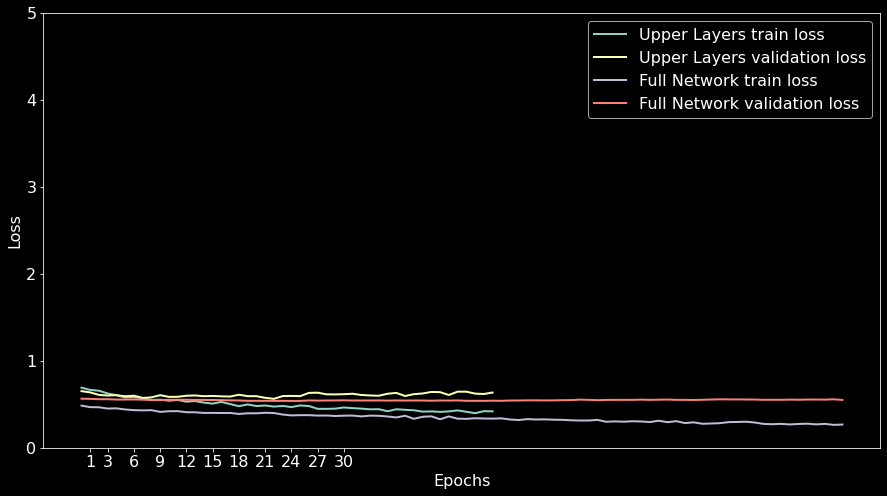

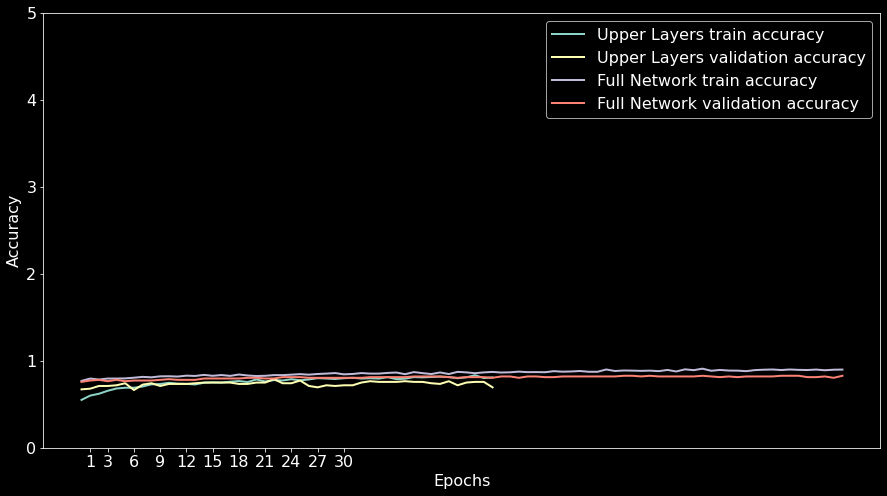

In [ ]:
mobilenet_upper_hs = eff_upper_hs
mobilenet_full_network_hs = eff_full_network_hs
mobilenet_mura_eval = eff_mura_eval

print("Upper Layers Evaluation:")
print(" ")
print("Train Loss     : {0:.5f}".format(mobilenet_upper_hs.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(mobilenet_upper_hs.history['val_loss'][-1]))
print("---")
print("Train Accuracy     : {0:.5f}".format(mobilenet_upper_hs.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(mobilenet_upper_hs.history['val_accuracy'][-1]))
print("---")
print("Train Cohen Kappa: {0:.5f}".format(mobilenet_upper_hs.history['cohen_kappa'][-1]))
print("Validation Cohen Kappa: {0:.5f}".format(mobilenet_upper_hs.history['val_cohen_kappa'][-1]))
print("---")
print("---")
print("Full Network Evaluation:")
print(" ")
print("Train Loss     : {0:.5f}".format(mobilenet_full_network_hs.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(mobilenet_full_network_hs.history['val_loss'][-1]))
print("---")
print("Train Accuracy     : {0:.5f}".format(mobilenet_full_network_hs.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(mobilenet_full_network_hs.history['val_accuracy'][-1]))
print("---")
print("Train Cohen Kappa: {0:.5f}".format(mobilenet_full_network_hs.history['cohen_kappa'][-1]))
print("Validation Cohen Kappa: {0:.5f}".format(mobilenet_full_network_hs.history['val_cohen_kappa'][-1]))

print()
print('---')
print("Test Loss      : {0:.5f}".format(mobilenet_mura_eval[0]))
print("Test Accuracy      : {0:.5f}".format(mobilenet_mura_eval[1]))


# Plot train and validation error per epoch.
plot_history(
    hs={
        'Upper Layers': mobilenet_upper_hs,
        'Full Network': mobilenet_full_network_hs
    },
    epochs=30,
    metric='loss'
)
plot_history(
    hs={
        'Upper Layers': mobilenet_upper_hs,
        'Full Network': mobilenet_full_network_hs
    },
    epochs=30,
    metric='accuracy'
)

# Save Final Model 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
if not os.path.exists('./content/gdrive/My Drive/efficientnet'):
    os.makedirs('./content/gdrive/My Drive/efficientnet')

model = eff_mura_model
model.save("/content/gdrive/My Drive/efficientnet/efficientnet_model")

# Load Model

In [ ]:
!pip install -U tensorflow-addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping # Callback for early stopping
from tensorflow.keras.layers import Input, Dense, Dropout # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from keras import models

In [ ]:
new_model = models.load_model(filepath='/content/gdrive/My Drive/efficientnet/efficientnet_model')

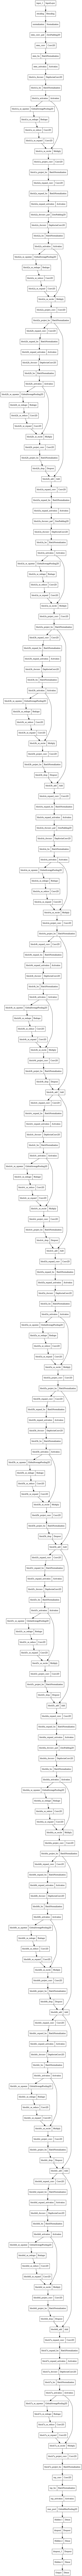

In [ ]:
%matplotlib notebook

from tensorflow.keras.utils import plot_model
plot_model(new_model, to_file='model.png')

from IPython.display import Image 
Image('model.png')

# Evaluate in other categories

## SHOULDER

In [ ]:
# για μεγεθος εικονας και ποιο part of body
s = 256
part = "XR_SHOULDER"

In [ ]:
j_dev = 0
for i in range(3197):
  if (valid_data_paths['category'][i] == part):
    j_dev +=1
print (j_dev)  

563


In [ ]:
x_dev = np.ones((j_dev, s, s, 3))
y_dev = np.ones((j_dev, 1))

In [ ]:
from PIL import Image
newsize = (s, s)
j = 0
for i in range(3197):
    if valid_data_paths['category'][i] == part:
      image = Image.open('/content/'+valid_data_paths['image_path'][i])
      image = image.resize(newsize)
      image = np.array(image)
      if(image.shape==(s, s, 3)):
          image =image[:s, :s,:1]
          image = image.reshape((s, s, 1))

      image = image.reshape((s, s, 1))
      
      x_dev[j] = np.concatenate((image,image,image), axis=2)
      
          #create binary labels
      if(valid_data_paths['label'][i]) == 'positive':
          y_dev[j] = y_dev[j]*1
      else:
          y_dev[j] = y_dev[j]*0
      j+=1

In [ ]:
eff_mura_eval_shoulder = new_model.evaluate(x_dev, y_dev, verbose=1)

18/18 [==============================] - 19s 117ms/step - loss: 0.7556 - accuracy: 0.6199 - binary_crossentropy: 0.7556 - cohen_kappa: 0.2400


In [ ]:
print(eff_mura_eval_shoulder)

[0.7555906772613525, 0.6198934316635132, 0.7555906772613525, 0.2400050163269043]


## FOREARM

In [ ]:
# για μεγεθος εικονας και ποιο part of body
s = 256
part = "XR_FOREARM"

In [ ]:
j_dev = 0
for i in range(3197):
  if (valid_data_paths['category'][i] == part):
    j_dev +=1
print (j_dev)  

301


In [ ]:
x_dev = np.ones((j_dev, s, s, 3))
y_dev = np.ones((j_dev, 1))

In [ ]:
from PIL import Image
newsize = (s, s)
j = 0
for i in range(3197):
    if valid_data_paths['category'][i] == part:
      image = Image.open('/content/'+valid_data_paths['image_path'][i])
      image = image.resize(newsize)
      image = np.array(image)
      if(image.shape==(s, s, 3)):
          image =image[:s, :s,:1]
          image = image.reshape((s, s, 1))

      image = image.reshape((s, s, 1))
      
      x_dev[j] = np.concatenate((image,image,image), axis=2)
      
          #create binary labels
      if(valid_data_paths['label'][i]) == 'positive':
          y_dev[j] = y_dev[j]*1
      else:
          y_dev[j] = y_dev[j]*0
      j+=1

In [ ]:
eff_mura_eval_forearm = new_model.evaluate(x_dev, y_dev, verbose=1)

10/10 [==============================] - 1s 139ms/step - loss: 0.5580 - accuracy: 0.7143 - binary_crossentropy: 0.5580 - cohen_kappa: 0.4284


In [ ]:
print(eff_mura_eval_forearm)

[0.5580263733863831, 0.7142857313156128, 0.5580263733863831, 0.4284136891365051]


## ELBOW

In [ ]:
# για μεγεθος εικονας και ποιο part of body
s = 256
part = "XR_ELBOW"

In [ ]:
j_dev = 0
for i in range(3197):
  if (valid_data_paths['category'][i] == part):
    j_dev +=1
print (j_dev)  

465


In [ ]:
x_dev = np.ones((j_dev, s, s, 3))
y_dev = np.ones((j_dev, 1))

In [ ]:
from PIL import Image
newsize = (s, s)
j = 0
for i in range(3197):
    if valid_data_paths['category'][i] == part:
      image = Image.open('/content/'+valid_data_paths['image_path'][i])
      image = image.resize(newsize)
      image = np.array(image)
      if(image.shape==(s, s, 3)):
          image =image[:s, :s,:1]
          image = image.reshape((s, s, 1))

      image = image.reshape((s, s, 1))
      
      x_dev[j] = np.concatenate((image,image,image), axis=2)
      
          #create binary labels
      if(valid_data_paths['label'][i]) == 'positive':
          y_dev[j] = y_dev[j]*1
      else:
          y_dev[j] = y_dev[j]*0
      j+=1

In [ ]:
eff_mura_eval_elbow = new_model.evaluate(x_dev, y_dev, verbose=1)

15/15 [==============================] - 2s 134ms/step - loss: 0.6132 - accuracy: 0.6860 - binary_crossentropy: 0.6132 - cohen_kappa: 0.3722


In [ ]:
print(eff_mura_eval_elbow)

[0.6132162809371948, 0.6860215067863464, 0.6132162809371948, 0.37220269441604614]


## FINGER

In [ ]:
# για μεγεθος εικονας και ποιο part of body
s = 256
part = "XR_FINGER"

In [ ]:
j_dev = 0
for i in range(3197):
  if (valid_data_paths['category'][i] == part):
    j_dev +=1
print (j_dev)  

461


In [ ]:
x_dev = np.ones((j_dev, s, s, 3))
y_dev = np.ones((j_dev, 1))

In [ ]:
from PIL import Image
newsize = (s, s)
j = 0
for i in range(3197):
    if valid_data_paths['category'][i] == part:
      image = Image.open('/content/'+valid_data_paths['image_path'][i])
      image = image.resize(newsize)
      image = np.array(image)
      if(image.shape==(s, s, 3)):
          image =image[:s, :s,:1]
          image = image.reshape((s, s, 1))

      image = image.reshape((s, s, 1))
      
      x_dev[j] = np.concatenate((image,image,image), axis=2)
      
          #create binary labels
      if(valid_data_paths['label'][i]) == 'positive':
          y_dev[j] = y_dev[j]*1
      else:
          y_dev[j] = y_dev[j]*0
      j+=1

In [ ]:
eff_mura_eval_finger = new_model.evaluate(x_dev, y_dev, verbose=1)

15/15 [==============================] - 2s 97ms/step - loss: 1.0423 - accuracy: 0.5336 - binary_crossentropy: 1.0423 - cohen_kappa: 0.0076


In [ ]:
print(eff_mura_eval_finger)

[1.0423474311828613, 0.5336225628852844, 1.0423474311828613, 0.007609546184539795]


## WRIST

In [ ]:
# για μεγεθος εικονας και ποιο part of body
s = 256
part = "XR_WRIST"

In [ ]:
j_dev = 0
for i in range(3197):
  if (valid_data_paths['category'][i] == part):
    j_dev +=1
print (j_dev)  

659


In [ ]:
x_dev = np.ones((j_dev, s, s, 3))
y_dev = np.ones((j_dev, 1))

In [ ]:
from PIL import Image
newsize = (s, s)
j = 0
for i in range(3197):
    if valid_data_paths['category'][i] == part:
      image = Image.open('/content/'+valid_data_paths['image_path'][i])
      image = image.resize(newsize)
      image = np.array(image)
      if(image.shape==(s, s, 3)):
          image =image[:s, :s,:1]
          image = image.reshape((s, s, 1))

      image = image.reshape((s, s, 1))
      
      x_dev[j] = np.concatenate((image,image,image), axis=2)
      
          #create binary labels
      if(valid_data_paths['label'][i]) == 'positive':
          y_dev[j] = y_dev[j]*1
      else:
          y_dev[j] = y_dev[j]*0
      j+=1

In [ ]:
eff_mura_eval_wrist = new_model.evaluate(x_dev, y_dev, verbose=1)

21/21 [==============================] - 2s 102ms/step - loss: 0.8072 - accuracy: 0.5493 - binary_crossentropy: 0.8072 - cohen_kappa: 0.1572


In [ ]:
print(eff_mura_eval_wrist)

[0.8072345852851868, 0.5493171215057373, 0.8072345852851868, 0.15715473890304565]


## HAND

In [ ]:
# για μεγεθος εικονας και ποιο part of body
s = 256
part = "XR_HAND"

In [ ]:
j_dev = 0
for i in range(3197):
  if (valid_data_paths['category'][i] == part):
    j_dev +=1
print (j_dev)  

460


In [ ]:
x_dev = np.ones((j_dev, s, s, 3))
y_dev = np.ones((j_dev, 1))

In [ ]:
from PIL import Image
newsize = (s, s)
j = 0
for i in range(3197):
    if valid_data_paths['category'][i] == part:
      image = Image.open('/content/'+valid_data_paths['image_path'][i])
      image = image.resize(newsize)
      image = np.array(image)
      if(image.shape==(s, s, 3)):
          image =image[:s, :s,:1]
          image = image.reshape((s, s, 1))

      image = image.reshape((s, s, 1))
      
      x_dev[j] = np.concatenate((image,image,image), axis=2)
      
          #create binary labels
      if(valid_data_paths['label'][i]) == 'positive':
          y_dev[j] = y_dev[j]*1
      else:
          y_dev[j] = y_dev[j]*0
      j+=1

In [ ]:
eff_mura_eval_hand = new_model.evaluate(x_dev, y_dev, verbose=1)

15/15 [==============================] - 2s 133ms/step - loss: 1.1140 - accuracy: 0.4500 - binary_crossentropy: 1.1140 - cohen_kappa: 0.0347


In [ ]:
print(eff_mura_eval_hand)

[1.113985538482666, 0.44999998807907104, 1.113985538482666, 0.0346716046333313]
